# 01. Load the Dataset

In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
test  = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

In [2]:
original_test = test.copy()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# 02. Cleaning Strategy

### Missing Values

In [10]:
# Categorical
cat_cols = ['Gender','Married','Dependents','Self_Employed',
            'Credit_History','Loan_Amount_Term']

for col in cat_cols:
    mode_val = train[col].mode()[0]
    train[col].fillna(mode_val, inplace=True)

# Apply categorical fill
for col in cat_cols:
    mode_val = train[col].mode()[0]
    test[col].fillna(mode_val, inplace=True)

In [11]:
# Numerical
num_cols = ['LoanAmount']

for col in num_cols:
    median_val = train[col].median()
    train[col].fillna(median_val, inplace=True)

# Apply numerical fill
for col in num_cols:
    median_val = train[col].median()
    test[col].fillna(median_val, inplace=True)

# 03. Preprocessing

### Encode

In [12]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':1, 'N':0})

In [13]:
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(int)
test['Dependents']  = test['Dependents'].replace('3+', 3).astype(int)

### One-Hot Encoding

In [14]:
train = pd.get_dummies(train, drop_first=True)
test  = pd.get_dummies(test, drop_first=True)

### Test = Train

In [15]:
missing_cols = set(train.columns) - set(test.columns)

for col in missing_cols:
    test[col] = 0

In [16]:
test = test[train.drop('Loan_Status', axis=1).columns]

# 04. Train / Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = train.drop("Loan_Status", axis=1)
y = train["Loan_Status"]

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 05. Standard Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [21]:
test_scaled = scaler.transform(test)

# 06. Classification Models

In [22]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

svc = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
lr  = LogisticRegression(max_iter=2000)

In [23]:
svc.fit(X_train_scaled, y_train)

SVC(probability=True)

In [24]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [25]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    "SVC": svc,
    "KNN Classifier": knn,
    "Logistic Regression": lr
}

In [27]:
for name, model in models.items():
    preds = model.predict(X_valid_scaled)
    acc = accuracy_score(y_valid, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_valid, preds))
    print("===========================================================")


SVC Accuracy: 0.6911
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123


KNN Classifier Accuracy: 0.8455
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


Logistic Regression Accuracy: 0.8537
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77  

### 07. ROC Curve for each Model

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

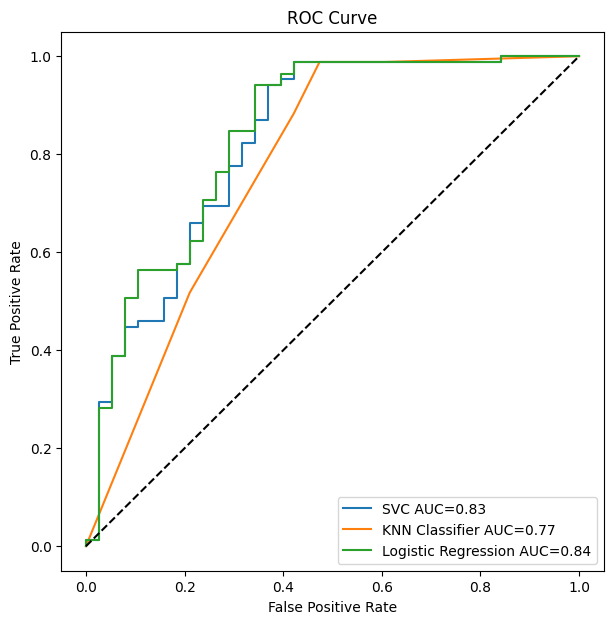

In [29]:
plt.figure(figsize=(7,7))

for name, model in models.items():
    probs = model.predict_proba(X_valid_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} AUC={roc_auc:.2f}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 07. Save Best Model

In [30]:
best_model = lr

In [31]:
import joblib

joblib.dump(best_model, "loan_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# 08. Prepare Test

In [32]:
test_scaled = scaler.transform(test)
test_predictions = best_model.predict(test_scaled)

In [33]:
submission = pd.DataFrame({
    "Loan_ID": original_test["Loan_ID"],
    "Loan_Status": test_predictions
})

submission["Loan_Status"] = submission["Loan_Status"].map({1:"Y", 0:"N"})
submission.to_csv("submission.csv", index=False)